In [1]:
from shapely.geometry import Point, LineString, LinearRing, Polygon

### 1. shapely.geometry can create basic geometry objects

In [3]:
point = Point(0.0, 0.0)
line = LineString([(0, 0), (1, 1)])
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

#### It also allows to create multi-objects

In [5]:
from shapely.geometry import collection, MultiPoint, MultiLineString, MultiPolygon

In [6]:
points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)

#### For each geometric object, there are some attributes that we can get

In [8]:
list(point.coords)

[(0.0, 0.0)]

In [9]:
point.xy

(array('d', [0.0]), array('d', [0.0]))

In [10]:
line.length

1.4142135623730951

In [11]:
polygon.area

0.5

In [12]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)

In [15]:
list(polygon.exterior.coords)

[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [14]:
# return the minimum distance to the other geometric object
point.distance(line)

0.0

### linear referencing methods

object.interpolate(distance[, normalized=False]) <br>
    Return a point at the specified distance along a linear geometric object.
    
object.project(other[, normalized=False]) <br>
Returns the distance along this geometric object to a point nearest the other object.

The project() method is the inverse of interpolate().

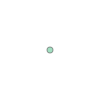

In [16]:
ip = LineString([(0, 0), (0, 1), (1, 1)]).interpolate(1.5)
ip

In [17]:
LineString([(0, 0), (0, 1), (1, 1)]).project(ip)

1.5

### Unary and Binary predicates

In [18]:
Point().is_empty

True

In [19]:
MultiPolygon([Point(0, 0).buffer(2.0), Point(1, 1).buffer(2.0)]).is_valid

False

In [20]:
coords = [(0, 0), (1, 1)]
LineString(coords).contains(Point(0.5, 0.5))

True

In [21]:
LineString(coords).crosses(LineString([(0, 1), (1, 0)]))

True


object.intersects(other)

Returns True if the boundary or interior of the object intersect in any way with those of the other.

In other words, geometric objects intersect if they have any boundary or interior point in common.

object.overlaps(other)

Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.

object.touches(other)

Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.

object.within(other)

Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

object.relate(other)

Returns a string representation of the DE-9IM matrix of relationships between an object’s interior, boundary, exterior and those of another geometric object.


### Spatial analysis methods
As well as boolean attributes and methods, Shapely provides analysis methods that return new geometric objects.

**object.boundary**
Returns a lower dimensional object representing the object’s set-theoretic boundary.

The boundary of a polygon is a line, the boundary of a line is a collection of points. The boundary of a point is an empty (null) collection.

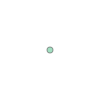

In [23]:
LineString([(0, 0), (1, 1)]).centroid

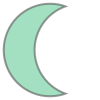

In [24]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.difference(b)

Several of these set-theoretic methods can be invoked using overloaded operators:

**intersection** can be accessed with and, &

**union** can be accessed with or, |

**difference** can be accessed with minus, -

**symmetric_difference** can be accessed with xor, ^

### Constructive methods

**object.buffer(distance, resolution=16, cap_style=1, join_style=1, mitre_limit=5.0, single_sided=False)**
Returns an approximate representation of all points within a given distance of the this geometric object.

In [25]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
dilated = line.buffer(0.5)
eroded = dilated.buffer(-0.3)

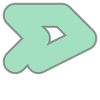

In [26]:
dilated

**object.convex_hull**
Returns a representation of the smallest convex Polygon containing all the points in the object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

**object.envelope**

Returns a representation of the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains the object.

**object.simplify(tolerance, preserve_topology=True)**

Returns a simplified representation of the geometric object.

### operations: nearest_points

**shapely.ops.nearest_points(geom1, geom2)**

Returns a tuple of the nearest points in the input geometries. The points are returned in the same order as the input geometries.

In [27]:
from shapely.ops import nearest_points
triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
[o.wkt for o in nearest_points(triangle, square)]

['POINT (0.5 1)', 'POINT (0.5 2)']

**shapely.ops.snap(geom1, geom2, tolerance)**

Snaps vertices in geom1 to vertices in the geom2. A copy of the snapped geometry is returned. The input geometries are not modified.

The tolerance argument specifies the minimum distance between vertices for them to be snapped.

In [28]:
from shapely.ops import snap
square = Polygon([(1,1), (2, 1), (2, 2), (1, 2), (1, 1)])
line = LineString([(0,0), (0.8, 0.8), (1.8, 0.95), (2.6, 0.5)])
result = snap(line, square, 0.5)
result.wkt

'LINESTRING (0 0, 1 1, 2 1, 2.6 0.5)'

**shapely.ops.split(geom, splitter)**

Splits a geometry by another geometry and returns a collection of geometries. This function is the theoretical opposite of the union of the split geometry parts. If the splitter does not split the geometry, a collection with a single geometry equal to the input geometry is returned.

**shapely.ops.substring(geom, start_dist, end_dist[, normalized=False])**

Return the LineString between start_dist and end_dist or a Point if they are at the same location

### transformation
1. wkt
2. wkb
3. np.ndarray

In [29]:
Point(0, 0).wkt

'POINT (0 0)'

In [30]:
Point(0, 0).wkb

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [31]:
from shapely import wkb
pt = Point(0, 0)
wkb.dumps(pt)

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [32]:
wkb.loads(pt.wkb).wkt

'POINT (0 0)'

In [33]:
from numpy import asarray
asarray(Point(0, 0))

C:\Users\Zhiyan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([0., 0.])

In [35]:
from shapely.geometry import asPoint
import numpy as np
pa = asPoint(np.array([0.0, 0.0]))
pa.wkt

C:\Users\Zhiyan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPoint()' or 'PointAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Point()' constructor instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


'POINT (0 0)'

In [36]:
from shapely.geometry import asLineString
la = asLineString(np.array([[1.0, 2.0], [3.0, 4.0]]))
la.wkt

C:\Users\Zhiyan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asLineString()' or 'LineStringAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'LineString()' constructor instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


'LINESTRING (1 2, 3 4)'